# Mini-Project 1: Machine Learning 101

Christian Martel (260867191)

Luka Loignon (260871296)

Marie Guertin (260870552)

# PART II: Letter Recognition Dataset

Dataset of character image features. Goal is to identify the letter.
https://archive.ics.uci.edu/ml/datasets/Letter+Recognition?fbclid=IwAR2QJ1w92tCvATRgyAbEDZ7sOuYViNBxxvfp7ofTFHCljA6TcV68EskJTKA

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/git/COMP551/projects/p1

Mounted at /content/drive
/content/drive/MyDrive/git/COMP551/projects/p1


In [17]:
## Imports and Setup

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# other py files
import my_validation
import my_preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
np.random.seed(1234)

## Data Preprocessing

### 1. Import Data

It is indicated in the letter-recognition.names file that there are no missing attribute values in the dataset. Hence, no imputation is required.

All the features are integers so no one-hot-encoding is required.

In [18]:

columns = ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv("data/letter-recognition.data", usecols = range(15), names = columns)
display(df)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9


### 2. Split Train Test

In [19]:
from sklearn.model_selection import train_test_split

num_instances = df.shape[0]
num_train = int(0.8 * num_instances)

# shuffle dataset
df = df.sample(frac=1)

x_train_df, x_test_df, y_train_df, y_test_df = df.iloc[:num_train,1:], df.iloc[num_train:,1:], df.iloc[:num_train,0], df.iloc[num_train:,0]

### 3. Normalization


In [20]:
x_train_df =(x_train_df-x_train_df.min())/(x_train_df.max()-x_train_df.min())
x_test_df =(x_test_df-x_test_df.min())/(x_test_df.max()-x_test_df.min())
display(x_train_df)
display(x_test_df)


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
18172,0.200000,0.400000,0.266667,0.266667,0.266667,0.466667,0.333333,0.666667,0.000000,0.466667,0.533333,0.533333,0.400000,0.333333
16075,0.133333,0.533333,0.266667,0.400000,0.200000,0.466667,0.800000,0.200000,0.400000,0.466667,0.733333,0.533333,0.133333,0.800000
15388,0.133333,0.333333,0.266667,0.266667,0.133333,0.533333,0.400000,0.200000,0.333333,0.933333,0.400000,0.666667,0.066667,0.400000
13842,0.066667,0.066667,0.133333,0.066667,0.000000,0.266667,0.400000,0.400000,0.133333,0.466667,0.400000,0.733333,0.200000,0.533333
8610,0.133333,0.266667,0.266667,0.200000,0.200000,0.400000,0.466667,0.066667,0.400000,0.666667,0.466667,0.666667,0.200000,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.066667,0.066667,0.066667,0.200000,0.000000,0.466667,0.466667,0.066667,0.533333,0.466667,0.400000,0.533333,0.000000,0.533333
15882,0.400000,0.533333,0.600000,0.666667,0.600000,0.466667,0.266667,0.266667,0.133333,0.400000,0.266667,0.400000,0.533333,0.400000
9666,0.200000,0.400000,0.266667,0.333333,0.200000,0.533333,0.533333,0.466667,0.333333,0.400000,0.400000,0.600000,0.133333,0.533333
18455,0.400000,0.666667,0.533333,0.533333,0.600000,0.400000,0.466667,0.266667,0.400000,0.466667,0.466667,0.666667,0.466667,0.466667


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy
11353,0.333333,0.400000,0.333333,0.285714,0.266667,0.133333,0.733333,0.133333,0.200000,0.666667,0.666667,0.500000,0.357143,0.714286
14475,0.333333,0.400000,0.333333,0.571429,0.200000,0.200000,0.466667,0.400000,0.733333,0.466667,0.400000,1.000000,0.000000,0.500000
8297,0.266667,0.600000,0.266667,0.428571,0.133333,0.200000,0.466667,0.466667,0.133333,0.466667,0.400000,0.714286,0.214286,0.500000
2422,0.200000,0.400000,0.200000,0.285714,0.133333,0.400000,0.533333,0.666667,0.533333,0.466667,0.466667,0.357143,0.214286,0.500000
3092,0.133333,0.066667,0.200000,0.142857,0.133333,0.466667,0.466667,0.333333,0.600000,0.400000,0.400000,0.500000,0.071429,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,0.200000,0.200000,0.200000,0.357143,0.133333,0.333333,0.466667,0.666667,0.466667,0.466667,0.400000,0.285714,0.214286,0.500000
9449,0.133333,0.133333,0.200000,0.214286,0.200000,0.533333,0.533333,0.400000,0.400000,0.466667,0.400000,0.428571,0.214286,0.500000
8471,0.133333,0.200000,0.200000,0.142857,0.133333,0.333333,0.466667,0.266667,0.466667,0.466667,0.400000,0.714286,0.214286,0.500000
17048,0.333333,0.666667,0.400000,0.500000,0.200000,0.533333,0.466667,0.533333,0.533333,0.400000,0.466667,0.571429,0.142857,0.428571


### 3. Gradient Boosting

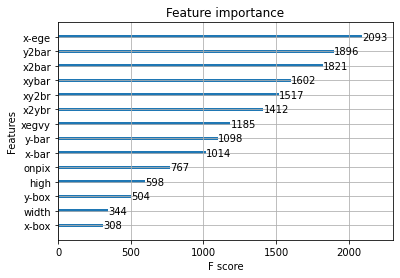

In [22]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model = XGBClassifier()
model.fit(x_train_df, y_train_df)
# plot feature importance
plot_importance(model)
plt.show()

## Experiments

### 1. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# number of folds for L-fold cross-validation
L = 5

# range of number of nearest neighbors (K)
K_list = range(1,31) # [1,2,...,30]

#### Cross-Validation

NameError: name 'err_matrix' is not defined

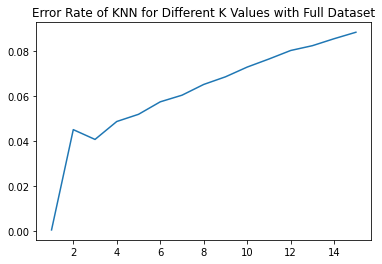

In [ ]:
# knn cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_train, y_train, K_list, L, my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of KNN for Different K Values with Full Dataset')
plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_k = K_list[np.argmin(err_val_means)]
print("Best K parameter: {k}".format(k=best_k))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

In [ ]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.knn_cross_validation(x_subset, y_subset, K_list, L, my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of KNN for Varying K Values with {size} Samples'.format(size = s))
    plt.plot(K_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(K_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('K (number of neighbours)')
    plt.ylabel('error rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Parameter on Test Set

In [ ]:
model = KNeighborsClassifier(n_neighbors=best_k)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

### 2. DECISION-TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Maximum tree depth hyper-parameter
max_depth_list = list(range(1,31)) #1-30

# Minimum samples per leaf parameter
min_samples_per_leaf_list = list(range(1, 301, 5)) #1-300

### For Maximum Depth Parameter

#### Cross-Validation

In [ ]:
# decision tree cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train, max_depth_list=max_depth_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of Decision Tree for Different Maximum Depth Values with Full Dataset')
plt.plot(max_depth_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(max_depth_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('Maximum Depth')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

# The best K parameter is the one providing the smallest error rate
best_max_depth = max_depth_list[np.argmin(err_val_means)]
print("Best max depth parameter: {k}".format(k=best_max_depth))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

In [ ]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_subset, y_subset, max_depth_list=max_depth_list, L=L, validation_metric_fn=my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of Decision Tree for Varying Max Depth Values with {size} Samples'.format(size = s))
    plt.plot(max_depth_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(max_depth_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('Max Depth')
    plt.ylabel('error rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Combination of Hyper-Parameters

In [ ]:
model = DecisionTreeClassifier(max_depth=best_max_depth)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

### For Minimum Samples per Leaf Parameter



#### Cross-Validation

Vary the minimum samples per leaf, with a constant None max depth.

In [ ]:
# decision tree cross-validation on full dataset
err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis=1)

# Visualize
plt.title('Error Rate of Decision Tree for Different Minimum Samples per Leaf Values with Full Dataset')
plt.plot(min_samples_per_leaf_list, np.mean(err_train_matrix, axis=1),  label='train')
plt.errorbar(min_samples_per_leaf_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
plt.legend()
plt.xlabel('Minimum Samples per Leaf')
plt.ylabel('Error Rate')
plt.ylim(0,0.5)
plt.show()

best_min_samples = min_samples_per_leaf_list[np.argmin(err_val_means)]
print("Best min samples per leaf parameter: {k}".format(k=best_min_samples))

#### Sample Growing Data

Observe the effect of growing the sample size on the training and validation errors.

In [ ]:
sizes = [100, 500, 1000, 5000]

for s in sizes:
    # select s random samples from train dataset
    x_subset, y_subset = x_train[inds[:s]], y_train[inds[:s]]
    
    # apply cross validation to get validation and train accuracy matrices 
    err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_subset, y_subset, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
    
    err_val_means = np.mean(err_val_matrix, axis=1)
    
    plt.title('Error Rate of Decision Tree for Varying Minimum Samples per Leaf Values with {size} Samples'.format(size = s))
    plt.plot(min_samples_per_leaf_list, np.mean(err_train_matrix, axis=1),  label='train')
    plt.errorbar(min_samples_per_leaf_list, err_val_means, np.std(err_val_matrix, axis=1), label='validation')
    plt.legend()
    plt.xlabel('Minium Samples per Leaf')
    plt.ylabel('Error Rate')
    plt.ylim(0,0.5)
    plt.show()

#### Use Best Parameter Combination on Test Set

In [ ]:
model = DecisionTreeClassifier(min_samples_leaf=best_min_samples)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))

### For Max Depth and Min Samples per Leaf Combined

#### Cross-Validation

In [ ]:
# Temporary lits to compute quickly
max_depth_list = list(range(1,31)) #1-30
min_samples_per_leaf_list = list(range(1,301,10)) #1-100

err_val_matrix, err_train_matrix = my_validation.dt_cross_validation(x_train, y_train,max_depth_list=max_depth_list, min_samples_per_leaf_list=min_samples_per_leaf_list, L=L, validation_metric_fn=my_validation.error_rate)
err_val_means = np.mean(err_val_matrix, axis = -1)
err_train_means = np.mean(err_train_matrix, axis = -1)

err_val_min_params = np.where(err_val_means == np.amin(err_val_means))
display(err_val_min_params)
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
xdata = list()
for md in max_depth_list:
  for i in range(len(min_samples_per_leaf_list)):
    xdata.append(md)

ydata = len(max_depth_list) * min_samples_per_leaf_list

zdata_val, zdata_train = err_val_means.flatten(), err_train_means.flatten()

# The best parameter is the one providing the smallest error rate
best_max_depth_combine = max_depth_list[err_val_min_params[0][0]]
print("Best max depth parameter: {k}".format(k=best_max_depth_combine))
best_min_samples_combine = min_samples_per_leaf_list[err_val_min_params[1][0]]
print("Best min samples per leaf parameter: {k}".format(k=best_min_samples_combine))

# Visualization
ax.scatter3D(xdata, ydata, err_val_means, label='validation', color='blue')

ax.scatter3D(xdata,ydata, err_train_means, label='train', color='red')

ax.set_title('Error Rate of Decision Tree for Different Max Depth and Minimum Samples per Leaf Values with Full Dataset')
ax.legend()
ax.set_xlabel('Maximum Depth')
ax.set_ylabel('Minimum Samples per Leaf')
ax.set_zlabel('Error Rate')
plt.show()

#### Use Best Parameter Combination on Test Set

In [ ]:
model = DecisionTreeClassifier(max_depth=best_max_depth_combine, min_samples_leaf=best_min_samples_combine)
start_time = time.time()
model.fit(x_train, y_train)
tr_end = time.time()
tr_time = tr_end - start_time

y_pred = model.predict(x_test)
pr_end = time.time()
pred_time = pr_end - tr_end

err_rate = my_validation.error_rate(y_test, y_pred)

print("Error Rate on Test Set: {err_rate}".format(err_rate=err_rate))
print("Training time: {tr_time}".format(tr_time=tr_time))
print("Prediction time: {pred_time}".format(pred_time=pred_time))